In [ ]:
%pip install timm
%pip install torch==1.10.0

In [1]:
CONFIG_PATH = './configs/for_handwritten_names/LSTM-CTCLoss-for-handwritten-names.json'
DEVICE = 'cuda'

### Обучение модели

INFO: DEVICE is cuda


Validation	acc: 0.0000, wer: 1.0000, cer: 1.0000, loop_time: 0m 11s

Epoch 0, Loss: 19.34852, cer: 1.1677, LR: 0.0003721, loop_time: 4m 14s

Validation	acc: 0.0000, wer: 1.0000, cer: 0.9583, loop_time: 0m 11s
Model weights saved

Epoch 1, Loss: 2.92305, cer: 0.8439, LR: 0.0009089, loop_time: 4m 16s

Validation	acc: 0.0000, wer: 1.0000, cer: 0.8058, loop_time: 0m 11s

Epoch 2, Loss: 2.81891, cer: 0.8018, LR: 0.0009988, loop_time: 4m 16s

Validation	acc: 0.0000, wer: 1.0000, cer: 0.8306, loop_time: 0m 11s

Epoch 3, Loss: 2.77063, cer: 0.7968, LR: 0.0009890, loop_time: 4m 16s

Validation	acc: 0.0000, wer: 1.0000, cer: 0.8019, loop_time: 0m 11s

Epoch 4, Loss: 2.75456, cer: 0.7941, LR: 0.0009698, loop_time: 4m 15s

Validation	acc: 0.0027, wer: 0.9974, cer: 0.7970, loop_time: 0m 11s
Model weights saved

Epoch 5, Loss: 2.74904, cer: 0.7955, LR: 0.0009414, loop_time: 4m 16s

Validation	acc: 0.0041, wer: 0.9960, cer: 0.7962, loop_time: 0m 11s
Model weights saved
Weights 

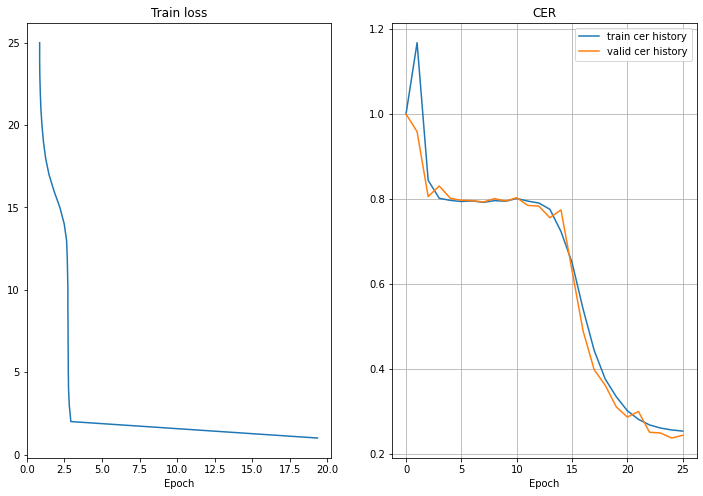

<Figure size 432x288 with 0 Axes>

In [3]:
#!g1.1
%run train.py --config_path "{CONFIG_PATH}"

### Тестирование модели

In [4]:
import cv2
import random

from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

from utils.predictor import OcrPredictor
from utils.config import Config

In [5]:
config = Config(CONFIG_PATH)
models_directory = config.get("save_dir")
images_directory = '../data/handwritten_names/test_v2/test'

models_directory # = '../data/experiments/test'

'../data/experiments/handwritten_names'

In [6]:
images = [f for f in listdir(images_directory) if isfile(join(images_directory, f))]
models = [f for f in listdir(models_directory) if isfile(join(models_directory, f))]

In [7]:
models = list(filter(lambda model_name: model_name[6:model_name.find('-', 6)].isdigit(), models))
models = sorted(models, key=lambda model_name: int(model_name[6:model_name.find('-', 6)]), reverse=True)
model_path = join(models_directory, models[0])
model_path # = "../data/experiments/handwritten_names/tiny-ViTSTR.ckpt"

'../data/experiments/handwritten_names/model-23-0.3807.ckpt'

In [8]:
image_path = join(images_directory, random.choice(images))
image_path

'../data/handwritten_names/test_v2/test/TEST_28039.jpg'

In [9]:
#!g1.1
predictor = OcrPredictor(
    model_path=model_path,
    config_path=CONFIG_PATH,
    device=DEVICE
)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/xdg_cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [10]:
img = cv2.imread(image_path)

In [11]:
#!g1.1
pred_data = predictor(img)

/home/jupyter/.local/lib/python3.7/site-packages/torch/nn/modules/rnn.py:692: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at  ../aten/src/ATen/native/cudnn/RNN.cpp:925.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


Prediction: SAYAN


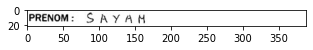

In [12]:
print("Prediction: " + pred_data)

plt.figure(figsize=(5, 5))
plt.imshow(img)